In [1]:
import os
import h5py
import json
import pandas as pd
from io import BytesIO
from PIL import Image
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision.io import ImageReadMode

In [2]:
root = '/home/jluesch/Documents/data/plankton/hdf5'

In [3]:

files = [el for el in os.listdir(root) if os.path.isfile(os.path.join(root, el))]
print(files)

['2011-TRAIN.hdf5', '2007-TRAIN.hdf5', '2013-VAL.hdf5', '2009-VAL.hdf5', '2008-VAL.hdf5', '2014-TRAIN.hdf5', '2012-VAL.hdf5', '2010-TRAIN.hdf5']


In [4]:
all_means = []

to_tensor = torchvision.transforms.ToTensor()

for hdf5_file in files[:1]:
    print(hdf5_file, end=" ")
    hdf5_file_path = os.path.join(root, hdf5_file)
    file = h5py.File(hdf5_file_path, "r")

    # Read the JSON string from the 'file_index' dataset
    file_index_json = file["file_index"][()]
    file_index = json.loads(file_index_json)

    # Add the HDF5 file name to each entry and accumulate the file entries
    for entry in file_index["files"][:1]:
        img_bytes = file[entry["path"]][()]
        img = torch.frombuffer(img_bytes, dtype=torch.uint8)
        img_t1 = torchvision.io.decode_image(img, ImageReadMode.RGB)
        img_t1 = (img_t1 / 255.0).to(torch.float32)
        print(img_t1.max(), img_t1.min(), img_t1.shape, img_t1.dtype)

        # plt.imshow(img.permute(1, 2, 0))
        # plt.show()
        f = BytesIO(img_bytes)
        img = Image.open(f).convert(mode="RGB")
        img_t2 = to_tensor(img)
        print(img_t2 == img_t1)
        print(
            img_t1.shape,
            img_t2.shape,
            img_t1.dtype,
            img_t2.dtype,
            torch.min(img_t1),
            torch.min(img_t2),
            torch.max(img_t1),
            torch.max(img_t2),
        )

2011-TRAIN.hdf5 tensor(1.) tensor(0.1333) torch.Size([3, 224, 224]) torch.float32
tensor([[[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True]],

        [[True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         [True, True, True,  ..., True, True, True],
         ...,
         [True, True, True,  ..., True, True, True],
         [True, True, Tr

/tmp/ipykernel_3286951/740672306.py:17: UserWarning: The given buffer is not writable, and PyTorch does not support non-writable tensors. This means you can write to the underlying (supposedly non-writable) buffer using the tensor. You may want to copy the buffer to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402374358/work/torch/csrc/utils/tensor_new.cpp:1462.)
  img = torch.frombuffer(img_bytes, dtype=torch.uint8)


In [5]:
print(np.mean(all_means, axis=0)/255., np.std(all_means, axis=0)/255.)


nan nan


/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [6]:
import torch
torch.zeros(100,100).flatten().shape

torch.Size([10000])

In [7]:
import pandas as pd
aa = {'aa':[0,1,2], 'bb':[11,12,13]}
df=pd.DataFrame(aa)
df.head()




aa  bb
0   0  11
1   1  12
2   2  13

In [8]:
df['img'] = df['aa'].apply(lambda x: 2*x)
bb=df.to_dict(orient='records')
print(bb)


a = []
a += bb
print(a)
print(a[0])

[{'aa': 0, 'bb': 11, 'img': 0}, {'aa': 1, 'bb': 12, 'img': 2}, {'aa': 2, 'bb': 13, 'img': 4}]
[{'aa': 0, 'bb': 11, 'img': 0}, {'aa': 1, 'bb': 12, 'img': 2}, {'aa': 2, 'bb': 13, 'img': 4}]
{'aa': 0, 'bb': 11, 'img': 0}


# LMDB Testing

In [9]:
from io import BytesIO
import pandas as pd
import h5py
import json
from PIL import Image
import lmdb
import os

In [10]:

data_path = "/home/jluesch/Documents/data/plankton"
data_files = sorted([el for el in os.listdir(data_path) if el.endswith(".hdf5")])
data_files = data_files[1:]
print(data_files)
print(data_files[0][:-5])

[]


IndexError: list index out of range

In [ ]:
map_size = int(1e11)
for data_file in data_files:
    train_data_path = f"/home/jluesch/Documents/data/plankton/{data_file}"

    lmdb_imgs_path = f"/home/jluesch/Documents/data/plankton/lmdb/{data_file[:-5]}_imgs"
    lmdb_labels_path = f"/home/jluesch/Documents/data/plankton/lmdb/{data_file[:-5]}_labels"
    print(lmdb_imgs_path, lmdb_labels_path)

    env_imgs = lmdb.open(lmdb_imgs_path, map_size=map_size)
    env_labels = lmdb.open(lmdb_labels_path, map_size=map_size)

    file = h5py.File(train_data_path, "r")
    # Read the JSON string from the 'file_index' dataset
    file_index_json = file["file_index"][()]
    file_index = json.loads(file_index_json)
    print(f"#SAMPLES: {file_index['files']}")

    with env_labels.begin(write=True) as txn_labels:
        with env_imgs.begin(write=True) as txn_imgs:
            for entry in file_index["files"]:
                if entry["index"] % 50000 == 0:
                    print(entry["index"], entry["class_id"], entry["path"])

                img_bytes = file[entry["path"]][()]
                txn_imgs.put(str(entry["index"]).encode("utf-8"), img_bytes)
                txn_labels.put(str(entry["index"]).encode("utf-8"), str(entry["class_id"]).encode("utf-8"))
    env_imgs.close()
    env_labels.close()
    print(f"FINISHED {lmdb_imgs_path}")

/home/jluesch/Documents/data/plankton/2008-VAL.hdf5
dict_keys(['index', 'path', 'class_str', 'class_id'])
0 0 0 2008_amoeba_IFCB1_2008_043_185649_01270.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
40000 40000 21 2008_detritus_IFCB1_2008_116_215800_01249.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
80000 80000 41 2008_Heterocapsa_triquetra_IFCB1_2008_056_161935_02442.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
120000 120000 51 2008_mix_IFCB1_2008_056_161935_01314.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
160000 160000 51 2008_mix_IFCB1_2008_073_144023_00095.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
200000 200000 51 2008_mix_IFCB1_2008_095_001923_02526.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
240000 240000 51 2008_mix_IFCB1_2008_114_175618_01003.png
dict_keys(['index', 'path', 'class_str', 'class_id'])
280000 280000 51 2008_mix_IFCB1_2008_199_143321_03547.png
dict_keys(['index', 'path', 'class_str', 

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

lmdb_env_imgs = lmdb.open(
    "/home/jluesch/Documents/data/plankton/lmdb/2007-TRAIN_imgs",
    readonly=True,
    lock=False,
    readahead=False,
    meminit=False,
)
lmdb_env_labels = lmdb.open(
    "/home/jluesch/Documents/data/plankton/lmdb/2007-TRAIN_labels",
    readonly=True,
    lock=False,
    readahead=False,
    meminit=False,
)

lmdb_txn_imgs = lmdb_env_imgs.begin()
lmdb_cursor_imgs = lmdb_txn_imgs.cursor()

lmdb_txn_labels = lmdb_env_labels.begin()
lmdb_cursor_labels = lmdb_txn_labels.cursor()

for i, ((key_i, value_i), (key_l, val_l)) in enumerate(zip(lmdb_cursor_imgs, lmdb_cursor_labels)):
    if i > 3:
        break
    print("key", int(key_i.decode()))
    f = BytesIO(value_i)

    img = Image.open(f).convert(mode="RGB")
    to_tensor = torchvision.transforms.ToTensor()
    img_tensor = to_tensor(img)
    buff = BytesIO()
    torch.save(img_tensor, buff)
    buff.seek(0)
    print(buff.read())
    print(img.size)

    #plt.imshow(img)
    #plt.show()
    print('label', val_l.decode())

key 0
b'PK\x03\x04\x00\x00\x08\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x12\x00archive/data.pklFB\x0e\x00ZZZZZZZZZZZZZZ\x80\x02ctorch._utils\n_rebuild_tensor_v2\nq\x00((X\x07\x00\x00\x00storageq\x01ctorch\nFloatStorage\nq\x02X\x01\x00\x00\x000q\x03X\x03\x00\x00\x00cpuq\x04J\x00L\x02\x00tq\x05QK\x00K\x03K\xe0K\xe0\x87q\x06M\x00\xc4K\xe0K\x01\x87q\x07\x89ccollections\nOrderedDict\nq\x08)Rq\ttq\nRq\x0b.PK\x07\x08/\xf8Ho\xa2\x00\x00\x00\xa2\x00\x00\x00PK\x03\x04\x00\x00\x08\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0e\x00"\x00archive/data/0FB\x1e\x00ZZZZZZZZZZZZZZZZZZZZZZZZZZZZZZ\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?\xb3\xb22?

In [ ]:


"/".join("/micromamba/envs/dinov2_1/lib/python3.10/site-packages/torch/distributed/run.".split("/")[:-1])



'/micromamba/envs/dinov2_1/lib/python3.10/site-packages/torch/distributed'

In [ ]:
import torch
sizes = [torch.Size([128, 256, 384]), torch.Size([128, 384])]
outputs = [(torch.zeros(sizes[0]), torch.zeros(sizes[1])) for i in range(4)]
outputs



[(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
  
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
  
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
  
          ...,
  
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
   

In [ ]:
keys_double = ['backbone.cls_token', 'backbone.pos_embed', 'backbone.mask_token', 'backbone.patch_embed.proj.weight', \
         'backbone.patch_embed.proj.bias', 'backbone.blocks.0.0.norm1.weight', 'backbone.blocks.0.0.norm1.bias', \
         'backbone.blocks.0.0.mlp.fc2.weight', 'backbone.blocks.1.0.mlp.fc2.bias', 'backbone.blocks.1.0.ls2.gamma', \
         'backbone.blocks.0.1.norm1.weight', 'backbone.blocks.0.1.norm1.bias', 'backbone.blocks.0.1.attn.qkv.weight']
state_dict_double = {el: 1 for el in keys_double}
state_dict_double = {k.replace("backbone.", ""): v for k, v in state_dict_double.items()}


keys_single = ['backbone.cls_token', 'backbone.pos_embed', 'backbone.mask_token', 'backbone.patch_embed.proj.weight', \
         'backbone.patch_embed.proj.bias', 'backbone.blocks.0.norm1.weight', 'backbone.blocks.0.norm1.bias', \
         'backbone.blocks.0.mlp.fc2.weight', 'backbone.blocks.0.mlp.fc2.bias', 'backbone.blocks.0.ls2.gamma', \
         'backbone.blocks.1.norm1.weight', 'backbone.blocks.1.norm1.bias', 'backbone.blocks.1.attn.qkv.weight']
state_dict_single = {el: 1 for el in keys_single}
state_dict_single = {k.replace("backbone.", ""): v for k, v in state_dict_single.items()}





In [ ]:
import re

double_nb_ptn = "blocks.[0-9]{1,2}.([0-9]{1,2}.[a-z]+[a-z0-9_\.]+)"

res_dict = {}
for k, v in state_dict_double.items():
    match = re.search(double_nb_ptn, k)
    if match:
        k_formatted = 'blocks.' + match.group(1)
        res_dict[k_formatted] = v
    else:
        res_dict[k] = v
state_dict = res_dict
    
print(state_dict.keys())


dict_keys(['backbone.cls_token', 'backbone.pos_embed', 'backbone.mask_token', 'backbone.patch_embed.proj.weight', 'backbone.patch_embed.proj.bias', 'blocks.0.norm1.weight', 'blocks.0.norm1.bias', 'blocks.0.mlp.fc2.weight', 'blocks.0.mlp.fc2.bias', 'blocks.0.ls2.gamma', 'blocks.1.norm1.weight', 'blocks.1.norm1.bias', 'blocks.1.attn.qkv.weight'])


In [ ]:
double_nb_ptn = "blocks.[0-9]{1,2}.([0-9]{1,2}.[a-z]+[a-z0-9_\.]+)"

{(('blocks.' + re.search(double_nb_ptn, k).group(1)) if re.search(double_nb_ptn, k) else k): v
 for k, v in state_dict.items()} 



{'backbone.cls_token': 1,
 'backbone.pos_embed': 1,
 'backbone.mask_token': 1,
 'backbone.patch_embed.proj.weight': 1,
 'backbone.patch_embed.proj.bias': 1,
 'blocks.0.norm1.weight': 1,
 'blocks.0.norm1.bias': 1,
 'blocks.0.attn.qkv.weight': 1,
 'blocks.0.attn.qkv.bias': 1,
 'blocks.0.attn.proj.weight': 1,
 'blocks.0.mlp.fc2.weight': 1,
 'blocks.0.mlp.fc2.bias': 1,
 'blocks.0.ls2.gamma': 1,
 'blocks.1.norm1.weight': 1,
 'blocks.1.norm1.bias': 1,
 'blocks.1.attn.qkv.weight': 1}

In [ ]:
def match_state_dict_keys(state_dict, keys_load, keys_model):
        print("Adapting keys")
        new_state_dict = dict()
        double_nb_ptn = "blocks.[0-9]{1,2}.([0-9]{1,2}.[a-z0-9_\.]+)"

        nb_double_ptn = sum([k1 for k1 in keys_load if re.search(double_nb_ptn, k1)])
        if nb_double_ptn / len(keys_load) > 0.2:
            # replace doubly numbered blocks in loaded dict by single block number
            new_state_dict = {
                (
                    ("blocks." + re.search(double_nb_ptn, k).group(1))
                    if re.search(double_nb_ptn, k)
                    else k
                ): v
                for k, v in state_dict.items()
            }
        else:  # inverse, replace single in loada by double ptn
            for k1 in keys_model:
                match = re.search(double_nb_ptn, k1)
                if match:
                    single_key = "blocks." + match.group(1)
                    if single_key in keys_load:
                        new_state_dict[k1] = state_dict[single_key]
                else:
                    new_state_dict[k1] = state_dict[k1]
        return new_state_dict


In [ ]:
keys_load = set(state_dict_single.keys())
keys_model = set(state_dict_double.keys())
print(keys_load)
match_state_dict_keys(state_dict_single, keys_load, keys_model)

{'pos_embed', 'blocks.0.ls2.gamma', 'blocks.0.mlp.fc2.weight', 'mask_token', 'patch_embed.proj.bias', 'blocks.0.norm1.weight', 'blocks.0.mlp.fc2.bias', 'patch_embed.proj.weight', 'cls_token', 'blocks.0.norm1.bias', 'blocks.1.norm1.bias', 'blocks.1.attn.qkv.weight', 'blocks.1.norm1.weight'}
Adapting keys
pos_embed
blocks.1.0.ls2.gamma
aa
blocks.0.ls2.gamma
bb
mask_token
patch_embed.proj.bias
patch_embed.proj.weight
blocks.1.0.mlp.fc2.bias
aa
blocks.0.mlp.fc2.bias
bb
cls_token
blocks.0.1.norm1.weight
aa
blocks.1.norm1.weight
bb
blocks.0.0.norm1.weight
aa
blocks.0.norm1.weight
bb
blocks.0.1.norm1.bias
aa
blocks.1.norm1.bias
bb
blocks.0.1.attn.qkv.weight
aa
blocks.1.attn.qkv.weight
bb
blocks.0.0.mlp.fc2.weight
aa
blocks.0.mlp.fc2.weight
bb
blocks.0.0.norm1.bias
aa
blocks.0.norm1.bias
bb


{'pos_embed': 1,
 'blocks.1.0.ls2.gamma': 1,
 'mask_token': 1,
 'patch_embed.proj.bias': 1,
 'patch_embed.proj.weight': 1,
 'blocks.1.0.mlp.fc2.bias': 1,
 'cls_token': 1,
 'blocks.0.1.norm1.weight': 1,
 'blocks.0.0.norm1.weight': 1,
 'blocks.0.1.norm1.bias': 1,
 'blocks.0.1.attn.qkv.weight': 1,
 'blocks.0.0.mlp.fc2.weight': 1,
 'blocks.0.0.norm1.bias': 1}

In [ ]:
nan_path = '/home/jluesch/Documents/output_dir/workst_cell_29052024_113056_vit_small/nan_data.pth'



In [ ]:
import torch
import matplotlib.pyplot as plt

obj = torch.load(nan_path)
obj.keys()

/home/jluesch/micromamba/envs/dinov2/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


dict_keys(['collated_global_crops', 'collated_local_crops', 'collated_masks', 'mask_indices_list', 'masks_weight', 'upperbound', 'n_masked_patches', 'attn_mask_gc', 'attn_mask_lc', 'local_crop_len', 'local_patch_pos', 'local_crop_dims'])

In [ ]:
gc_all = obj["collated_global_crops"].to(torch.float32)

In [ ]:
gc_all.shape

torch.Size([64, 3, 3584, 14])

torch.Size([3584, 14, 3])


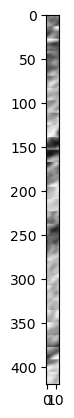

torch.Size([3584, 14, 3])


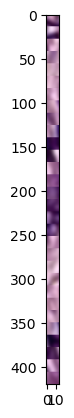

torch.Size([3584, 14, 3])


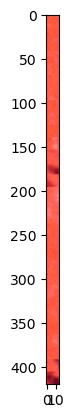

torch.Size([3584, 14, 3])


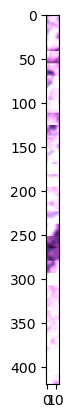

torch.Size([3584, 14, 3])


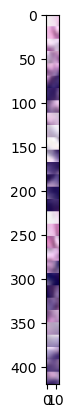

In [ ]:
for i in range(5):
    gc_1 = gc_all[i].permute(1, 2, 0)
    print(gc_1.shape)
    gc_1 = (gc_1 - gc_1.min()) / (gc_1.max() - gc_1.min())

    plt.imshow(gc_1[: 14 * 30, :, :])
    plt.show()

# Patch Embed Chan testing

In [1]:
import sys

import torch
sys.path.insert(0, "..")
import dinov2
from dinov2.layers.channel_patch_embed import PatchEmbedPerChannel
from dinov2.layers.patch_embed import PatchEmbed

/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/layers/attention.py:29: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/layers/block.py:34: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")
/home/jluesch/Documents/GitHub/plankton-dinov2/notebooks/../dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")


In [2]:
in_chans = 3
x3ch = torch.randn(16, 3, 224, 224)

opts = {
    "img_size": 224,
    "patch_size": 16,
    "in_chans": 3,
    "embed_dim": 768, # = Cout??
}

In [3]:
patch_e_chan = PatchEmbedPerChannel(**opts)
patch_e = PatchEmbed(**opts)

In [4]:
out2=patch_e(x3ch)

patch_embed torch.Size([16, 196, 768])


In [8]:
out_ch=patch_e_chan(x3ch, extra_tokens={})#{"channels": [[0,1,2],2,3,4]})

print(out_ch.shape)

torch.Size([16, 588, 768])


In [9]:
a1 = torch.ones([16, 4, 768, 14, 14])
a2 = torch.ones([1, 768, 1, 1])

In [7]:
(a1+a2).shape

torch.Size([16, 4, 768, 14, 14])